<a href="https://colab.research.google.com/github/Balamurugan245/Neuro_Nexus_Innovations/blob/main/Task1_TITANIC_SURVIVAL_PREDICTION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing titanic dataset
import pandas as pd
df=pd.read_csv("tested.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [3]:
#removing unnecessary rows
df.drop(["PassengerId","Name","Ticket","Cabin"], inplace=True, axis=1)

In [4]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
df.Embarked.value_counts()

,count
Embarked,
S,270
C,102
Q,46


In [6]:
#one hot encoding
df["Sex"].replace({"male":1,"female":0},inplace=True)
df["Embarked"].replace({"S":1,"C":2,"Q":3},inplace=True)

<ipython-input-6-6f9d31af295a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Sex"].replace({"male":1,"female":0},inplace=True)
<ipython-input-6-6f9d31af295a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sex"].replace({"male":1,"female":0},inplace=True)
<ipython-input-6-6f9d31af295a>:2

In [7]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked,0


In [15]:
#Replacing null value
df = df.fillna(method='ffill')
df.isnull().sum()

<ipython-input-15-7ff205993e42>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [9]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,0.363636,2.265550,0.636364,30.272590,0.447368,0.392344,35.627188,1.464115
std,0.481622,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576,0.685516
min,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000,2.000000
max,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,3.000000


In [16]:
df["Survived"].value_counts()

,count
Survived,
0,266
1,152


In [17]:
x = df.drop(["Survived"],axis=1)
y = df["Survived"]

In [18]:
#Balancing the dataset
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

,count
Survived,
0,266
1,266


In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [22]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

1.0

In [23]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)
score = regressor.score(x_test, y_test)
score

1.0

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train, y_train)
y_pred = rf_regressor.score(x_test,y_test)
y_pred

1.0

In [25]:
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

1.0

In [27]:
import numpy as np
y_pred=model.predict(x_test).reshape(-1)
y_pred=np.round(y_pred)
y_pred[:10]

array([ 1.,  0.,  1.,  1.,  0., -0.,  1.,  1.,  1.,  1.])

In [28]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        53

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107



<Axes: >

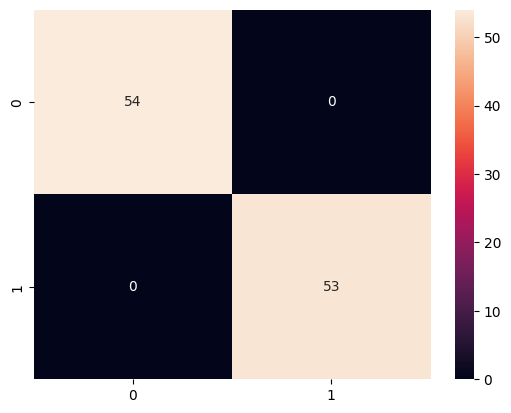

In [29]:
y=model.predict(x_test).round()
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix
result=confusion_matrix(y,y_test)
sns.heatmap(result,annot=True)